In [88]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [101]:
def calculate_hurst_exponent(stock_ticker):
    # Get the stock data from Yahoo Finance
    stock = yf.Ticker(stock_ticker)
    data = stock.history(period="max")
    # Extract the closing prices
    close_prices = data["Close"]
    # Calculate the log returns of the closing prices
    log_returns = np.log(close_prices).diff().dropna()#.add(1)
    # np.log(close_prices[1:] / close_prices[:-1])
    # Initialize the range of scales to consider
    interval = 253
    scales = range(interval, len(log_returns))
    # Initialize an empty list to store the Hurst exponents
    hurst_exponents = {}
    # Calculate the Hurst exponent for each scale
    for scale in scales:
        # Calculate the cumulative sum of the log returns
        scale_df = log_returns.iloc[scale - interval:scale]
        cumulative_sum = np.cumsum(scale_df)

        # Calculate the range of the cumulative sum
        R = np.max(cumulative_sum) - np.min(cumulative_sum)

        # Calculate the standard deviation of the log returns
        std = np.std(scale_df)

        # Calculate the Hurst exponent for this scale
        H = R / (std * interval ** 0.5)

        # Add the Hurst exponent to the list
        hurst_exponents[log_returns.index[scale]] = H    
    
    # Calculate the mean Hurst exponent over all scales
    # hurst_exponent = np.mean(hurst_exponents)

    return pd.DataFrame(hurst_exponents, index = ["$H_t$"])

In [102]:
# Calculate the Hurst exponents for two stocks
stock_1_hurst_exponents = calculate_hurst_exponent("AAPL").T
stock_2_hurst_exponents = calculate_hurst_exponent("GOOG").T



In [103]:
# print("Stock 1 Hurst Exponent:", stock_1_hurst_exponents)
# print("Stock 2 Hurst Exponent:", stock_2_hurst_exponents)
stock_1_hurst_exponents

,$H_t$
1981-12-15,1.718067
1981-12-16,1.723589
1981-12-17,1.733797
1981-12-18,1.716140
1981-12-21,1.699926
...,...
2023-11-16,1.999757
2023-11-17,2.000634
2023-11-20,2.002884
2023-11-21,2.003259


In [104]:
log_returns["1982"]

Date
1982-01-04    0.994334
1982-01-05    0.947513
1982-01-06    0.987952
1982-01-07    0.917929
1982-01-08    1.045032
                ...   
1982-12-27    1.023166
1982-12-28    0.992337
1982-12-29    0.964773
1982-12-30    0.955189
1982-12-31    0.995825
Name: Close, Length: 253, dtype: float64

<AxesSubplot:>

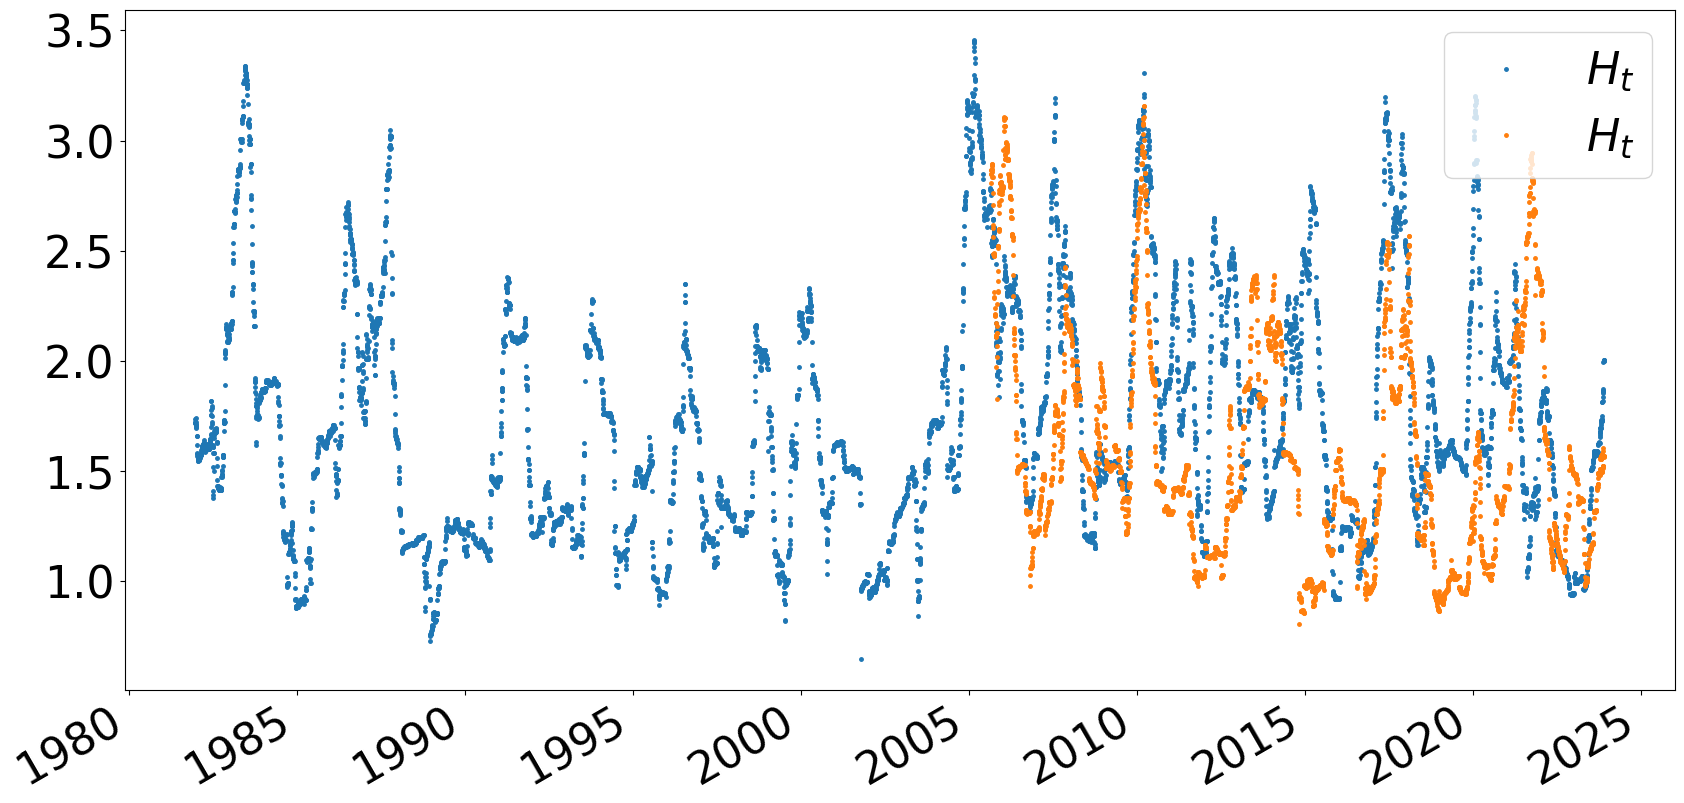

In [108]:
fig, ax = plt.subplots(figsize = (20,10))
stock_1_hurst_exponents.plot.line(color = "C0", ls = "",marker = ".",  markersize = 5, ax = ax)
stock_2_hurst_exponents.plot.line(color = "C1", ls = "", marker = ".",  markersize = 5, ax = ax)

In [96]:
# Compare the Hurst exponents of the two stocks
if stock_1_hurst_exponent > stock_2_hurst_exponent:
    print("Stock 1 is more likely to exhibit long-term trends than Stock 2.")
elif stock_1_hurst_exponent < stock_2_hurst_exponent:
    print("Stock 2 is more likely to exhibit long-term trends than Stock 1.")
else:
    print("Stock 1 and Stock 2 are equally likely to exhibit long-term trends.")


NameError: name 'stock_1_hurst_exponent' is not defined

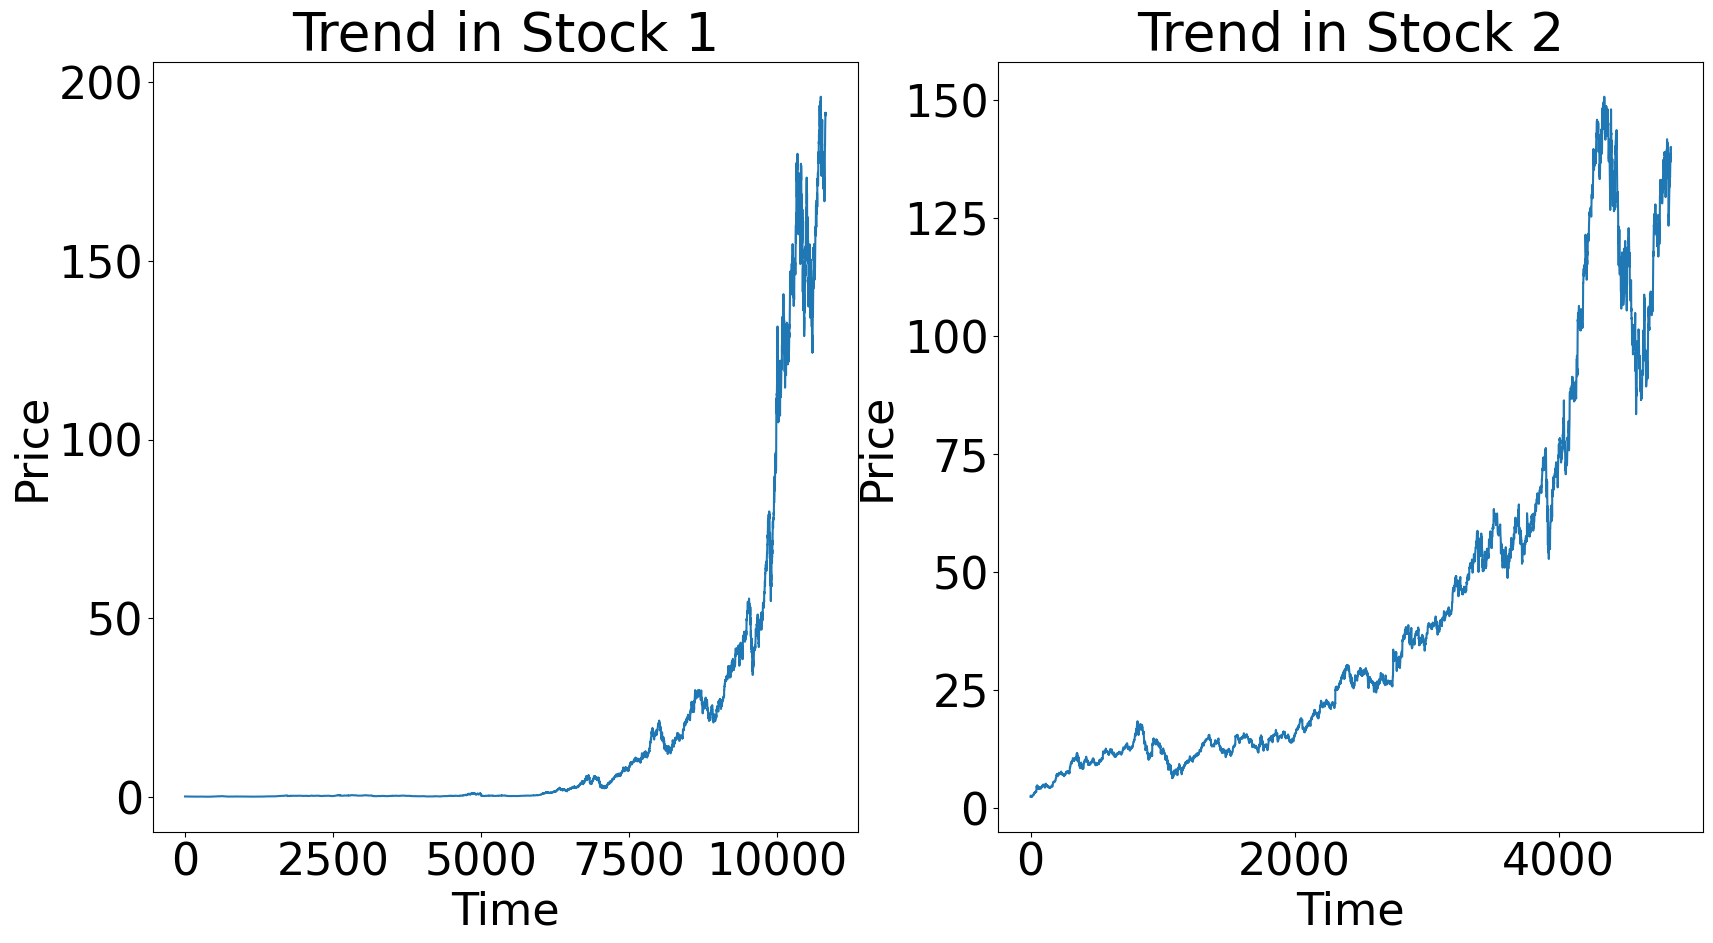

In [97]:
plt.rcParams.update({'font.size': 32}) 
# Plot the trends of the two stocks side by side
fig, ax = plt.subplots(1, 2, figsize = (20,10))

# Plot the trend for Stock 1
ax[0].plot(yf.Ticker("AAPL").history(period="max")["Close"].values)
ax[0].set_title("Trend in Stock 1")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Price")

# Plot the trend for Stock 2
ax[1].plot(yf.Ticker("GOOG").history(period="max")["Close"].values)
ax[1].set_title("Trend in Stock 2")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Price")

plt.show()